In [508]:
# Import libraries 
#import os                       #use: allows interacting with operating system, functions such as listing files in directory, modify env variables
import numpy as np              #use: easily perform numerical operations on data with higher speed and performance
import pandas as pd             #use: facilitates easier data manipulation and analysis through dataFrames
import matplotlib.pyplot as plt #use: allows to create interactive data visualizations in python 
%matplotlib inline              
                                #use: enables displaying plots inline in jupyter notebooks (comments cannot be added on same line as a magic command like this)

In [509]:
# Load the training Dataset
train_dataset = pd.read_csv("C:\\Users\\Saksham Kapoor\\Downloads\\datasetsandcodefilesstockmarketprediction\\Google_train_data.csv") #reads data as csv,doubled backslashes in path to avoid confusion with escape characters
train_dataset.head() # getting a sense of the data by printing first 5 rows

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [510]:
# use column titled 'Open' to train the model
training_set = train_dataset.iloc[:,1:2].values # [:,1:2] means all rows' 2nd columns ("Open") are copied to training_set
print(training_set) # print the training_set, it will only show the first 3 starting and last 3 ending values for large datasets
print(training_set.shape) # displays number of rows and columns of training_set in the format (row, column)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [511]:
# Normalizing the Dataset with MinMaxScaler imported from sklearn library
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1)) # creates a scaler with range [0,1] to normalize the data
scaled_training_set = scaler.fit_transform(training_set) # learns the min, max range of data and transforms it into [0,1] range 
scaled_training_set # display the scaled set 

# Why do we normalize the data in Machine Leaning ?
# Normalizing the data allows models like neural networks or gradient-based algorithms (eg. logistic Regression) to converge (find the optimal solution) faster.
# If we don't normalize, the features with larger ranges (0,1000) will dominate over smaller ranges (0,10), leading to slower and inefficient learning.

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [512]:
X_train = []
Y_train = []
for i in range(60, 1257):
    X_train.append(scaled_training_set[i-60:i, 0]) # stores stock prices of previous 60 days, not including today's price
    Y_train.append(scaled_training_set[i, 0]) # stores stock price of today
X_train = np.array(X_train) # convert lists to numpy arrays for faster operations
Y_train = np.array(Y_train)

# What are we doing in this code snippet ?
# We are preparing the data for training our machine learning model by assigining X_train as features(or input data) and Y_train as target values(or labels)
# X_train contains sequences of stock prices from the previous 60 days. This historical data is used to predict the stock price for the next day.
# Y_train contains the actual stock price for the next day, which is the target value we want to predict.
# The machine learning model will learn from the patterns in X_train (previous prices) and compare its own predictions to Y_train (actual next day's price) to evaluate and improve its accuracy.
# Eventually, the model will learn relationships between past and future stock prices, helping accurately make predictions for unseen data.

In [513]:
# Building the Ml model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input

regressor = Sequential()

regressor.add(Input(shape=(X_train.shape[1], 1)))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
              
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [521]:
# fitting the model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
regressor.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, 
              epochs = 50, 
              batch_size = 16,
              validation_split = 0.2,
              callbacks = [early_stopping], 
              verbose = 1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0027 - val_loss: 0.0043
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step 

In [522]:
# Extracting actual stock prices to compare the predictions against
dataset_test = pd.read_csv("C:\\Users\\Saksham Kapoor\\Downloads\\datasetsandcodefilesstockmarketprediction\\Google_test_data.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [523]:
# Preparing the input data for the model
dataset_total = pd.concat((train_dataset['Open'],dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values

inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 313): 
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [524]:
predicted_stock_price = regressor.predict(X_test) # the machine learning models predicts prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price) # undoes the transformation into range (0,1) before plotting graph

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


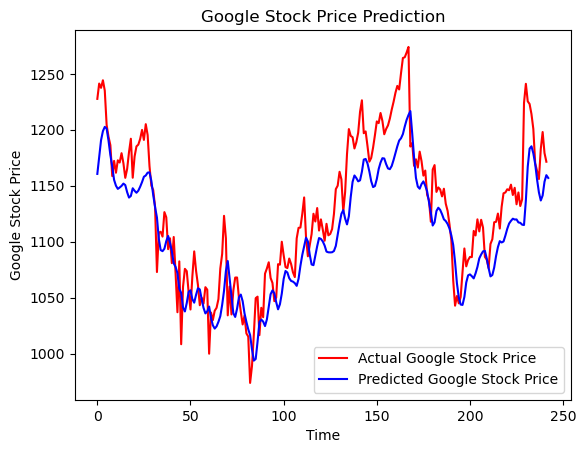

In [525]:
# Plotting the actual versus predicted prices
plt.plot(actual_stock_price[10:], color = 'red', label = 'Actual Google Stock Price') # Plots actual price as red line 
plt.plot(predicted_stock_price[10:], color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction') # set title of the plot
plt.xlabel('Time') # set x-axis label
plt.ylabel('Google Stock Price') # set y-axis label
plt.legend() # describes the meaning of symbols drawn in plot

In [526]:
print(f"Length of actual_stock_price: {len(actual_stock_price)}")
print(f"Length of predicted_stock_price: {len(predicted_stock_price)}")

Length of actual_stock_price: 252
Length of predicted_stock_price: 253


In [527]:
# Ensure both arrays have the same length
min_len = min(len(actual_stock_price), len(predicted_stock_price))

# Truncate both arrays to the same length
actual_stock_price = actual_stock_price[:min_len]
predicted_stock_price = predicted_stock_price[:min_len]

# Now calculate the metrics or plot the data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))

# Calculate R-squared (R²)
r2 = r2_score(actual_stock_price, predicted_stock_price)

# Display the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 31.494321294038322
Root Mean Squared Error (RMSE): 50.25125494867036
R-squared (R²): 0.3846579759872739
